In [1]:
# 폰트설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm

In [2]:
[f for f in fm.findSystemFonts() if f.lower().find('nanum') > -1]

['/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf']

In [3]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [4]:
!pip install wordcloud

In [5]:
# 라이브러리 가져오기
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
import seaborn as sns

from wordcloud import wordcloud
%matplotlib inline

## 데이터 가져오기

In [6]:
nk = 'https://raw.githubusercontent.com/NLP-kr/tensorflow-ml-nlp/master/4.TEXT_CLASSIFICATION/data_in/ratings_train.txt'

In [7]:
train_data = pd.read_csv(nk, delimiter='\t', header=0, quoting=3)

In [8]:
train_data.head(20)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


## 데이터 분석

### 학습 데이터의 개수

In [9]:
print('전체 학습 데이터의 개수 : {}'.format(len(train_data)))

전체 학습 데이터의 개수 : 150000


## 글자 단위 텍스트 길이 분포 확인

In [10]:
train_length = train_data['document'].astype(str).apply(len)

In [11]:
train_length

0         19
1         33
2         17
3         29
4         61
          ..
149995    19
149996    13
149997    31
149998    27
149999    24
Name: document, Length: 150000, dtype: int64

Text(0, 0.5, 'Number of reviews')

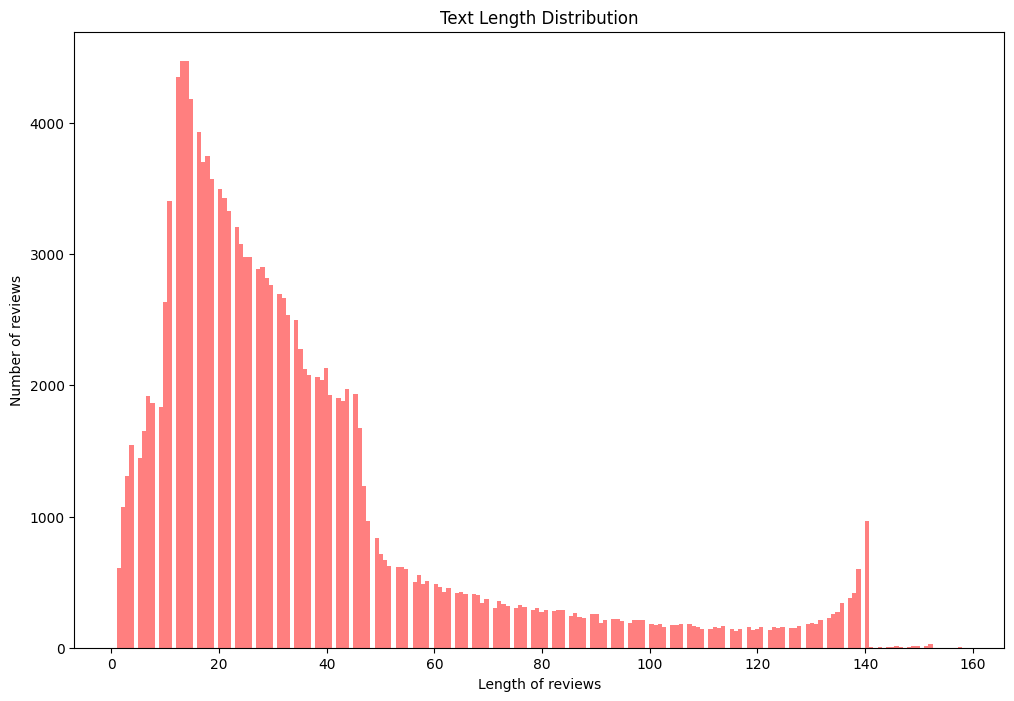

In [12]:
plt.figure(figsize=(12,8))
plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.title('Text Length Distribution')
plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')

In [13]:
train_length.describe()

count    150000.000000
mean         35.237493
std          29.582361
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         158.000000
Name: document, dtype: float64

## 단어 단위 텍스트 길이 분포

In [14]:
train_word_counts = train_data['document'].astype(str).apply(lambda x : len(x.split(' ')))

In [15]:
train_word_counts

0          5
1          4
2          1
3          6
4         11
          ..
149995     4
149996     3
149997     7
149998     6
149999     7
Name: document, Length: 150000, dtype: int64

Text(0, 0.5, 'Number of counts')

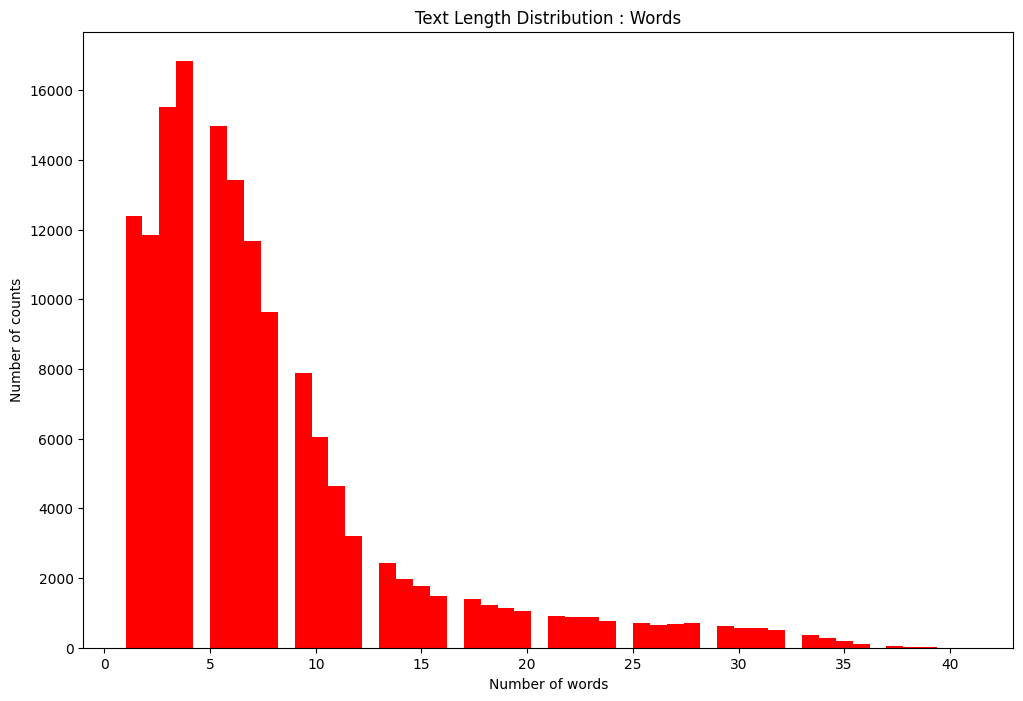

In [16]:
plt.figure(figsize=(12,8))
plt.hist(train_word_counts, bins=50, color='r', label='train')
plt.title('Text Length Distribution : Words')
plt.xlabel('Number of words')
plt.ylabel('Number of counts')

## 데이터 라벨 분포

<Axes: ylabel='count'>

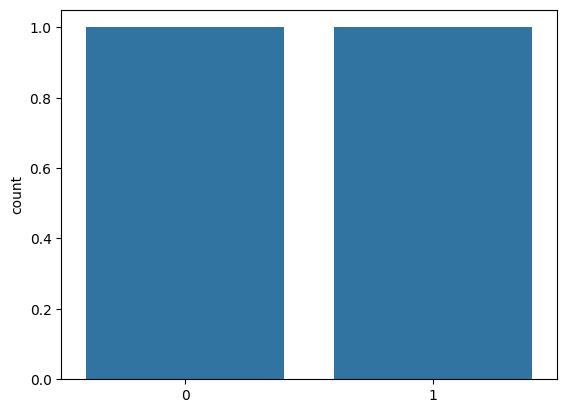

In [17]:
sns.countplot(train_data['label'].value_counts())

In [18]:
print('부정 레이블 분포 : {}\n긍정 레이블 분포 : {}'.format(train_data['label'].value_counts()[0],
                                              train_data['label'].value_counts()[1]))

부정 레이블 분포 : 75173
긍정 레이블 분포 : 74827


## 워드클라우드

In [19]:
train_reviews = [review for review in train_data['document'] if type(review) is str]

In [20]:
train_reviews[:10]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?']

In [21]:
wordcloud = wordcloud.WordCloud(font_path=fontpath).generate(' '.join(train_reviews))

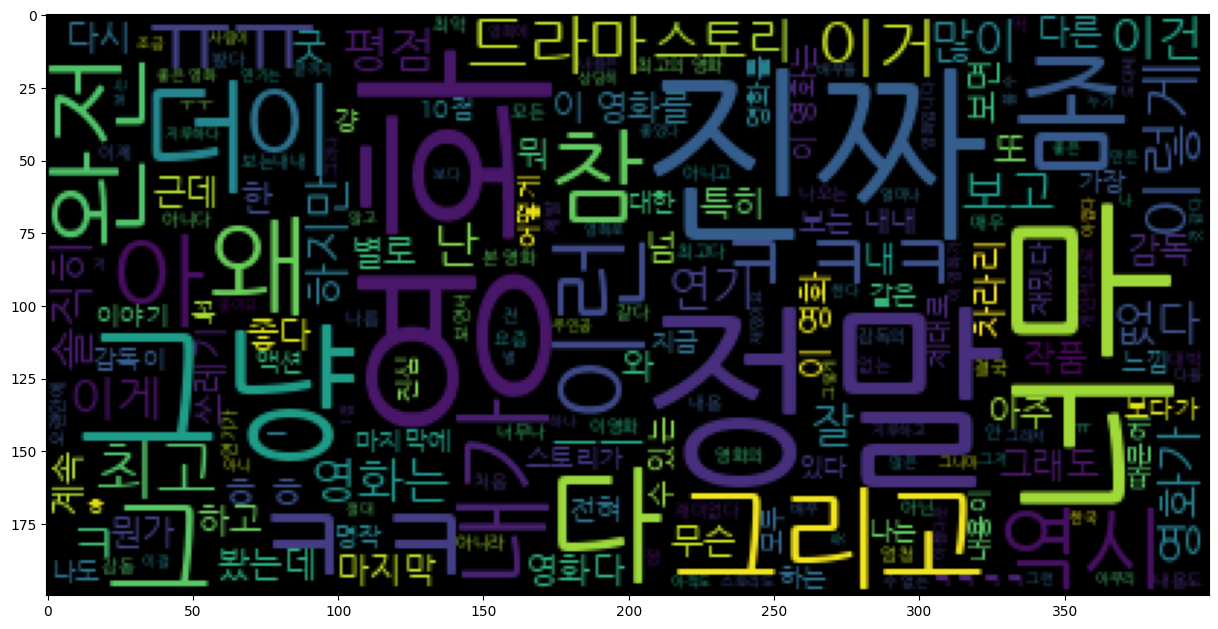

In [22]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)

In [39]:
# 긍정적인 리뷰와 부정적인 리뷰를 분리
pos_reviews = []
neg_reviews = []
for i in range(len(train_data)):
  if type(train_data['document'][i]) is str and train_data['label'][i] == 0:
    neg_reviews.append(train_data['document'][i])
  if type(train_data['document'][i]) is str and train_data['label'][i] == 1:
    pos_reviews.append(train_data['document'][i])

In [40]:
# 긍정과 부정 모두 많이 등장하는 단어는 제외
words_del = ['영화', '정말', '너무', '진짜']
pos_str = ' '.join(pos_reviews)
neg_str = ' '.join(neg_reviews)
for w_d in words_del:
  pos_str = pos_str.replace(w_d, '')
  neg_str = neg_str.replace(w_d, '')

(-0.5, 399.5, 199.5, -0.5)

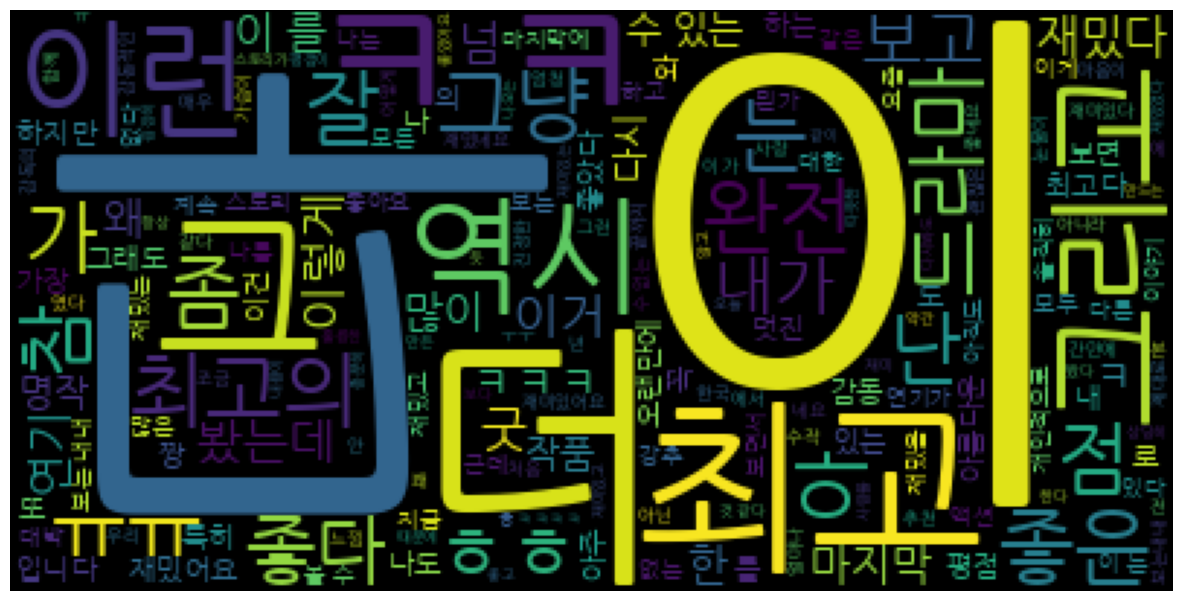

In [41]:
from wordcloud.wordcloud import WordCloud
# 긍정적인 리뷰에 대한 워드 클라우드
wordcloud = WordCloud(font_path=fontpath).generate(pos_str)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

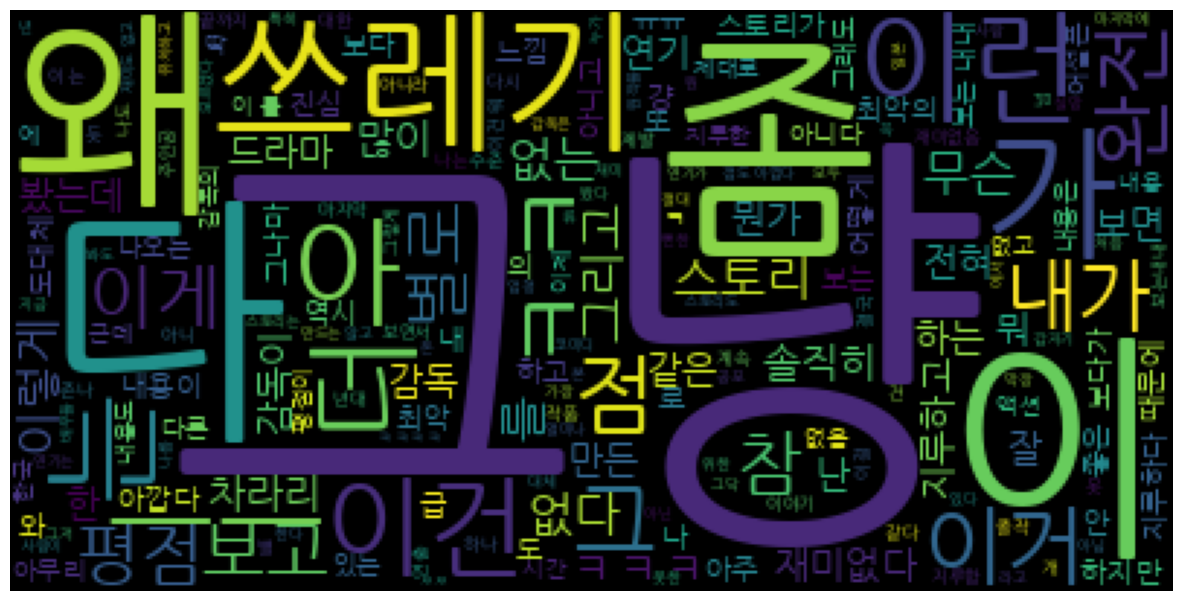

In [42]:
# 부정적인 리뷰에 대한 워드클라우드
wordcloud = WordCloud(font_path=fontpath).generate(neg_str)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis('off')

# 데이터 전처리

- 배치(batch): 모델 학습에 한 번에 입력할 데이터셋

- 에폭(epoch): 모델 학습시 전체 데이터를 학습한 횟 수

- 스텝(step): (모델 학습의 경우) 하나의 배치를 학습한 횟 수

- 토큰(token): (여기서는) 문장 또는 문단의 기본 구성 단위 (예를 들어 단위, 형태소)

- 토크나이징(tokenizing): 문단 또는 문장 문자열을 하나의 토큰 단위로 쪼개는 작업

- 인덱싱(indexing): 토큰 문자열을 숫자(인덱스)로 변환하여 표현하는 작업

- 사전(vocabulary): 토큰 문자열과 인덱스의 관계를 정의해둔 셋

- n-그램(n-gram): 입력한 문자열을 N개의 기준 단위로 절단하는 방법

## 전처리를 위한 라이브러리 로드

In [27]:
!pip install konlpy tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 42.2 MB/s eta 0:00:00


In [28]:
import re
import json
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tqdm import tqdm

In [29]:
train_data['document'][0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [30]:
re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', train_data['document'][0])

'아 더빙 진짜 짜증나네요 목소리'

In [31]:
train_data['document'] = train_data['document'].astype(str).apply(lambda x : re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', '', x))

## 토큰화(Tokenizing), 형태소 분석

In [43]:
okt = Okt()

In [44]:
train_data['document'][1]

'흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나'

In [45]:
okt.morphs(train_data['document'][1], stem=True)

['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다']

## 불용어(stopword) 제거

In [46]:
stop_words = ['은', '는', '이', '가', '하', '아', '것', '들', '의',
              '있', '되', '수', '보', '주', '등', '한']

In [47]:
def preprocessing(text, okt, remove_stopwords=False, stop_words=[]):
  # 1. 형태소 분석
  word_review = okt.morphs(text, stem=True)
  # 2. True인 경우 불용어 제거
  if remove_stopwords and len(stop_words) > 0:
    word_review = [word for word in word_review if word not in stop_words]

  return word_review

In [48]:
clean_train_reviews = []
for i in tqdm(range(len(train_data))):
  clean_train_reviews.append(preprocessing(train_data['document'][i], okt, True, stop_words))

100%|██████████| 150000/150000 [12:08<00:00, 205.89it/s]


In [49]:
clean_train_reviews[0]

['더빙', '진짜', '짜증나다', '목소리']

## 단어 사전 생성 및 인덱싱

In [50]:
# 토크나이저 가져오기
tokenizer = Tokenizer()

In [51]:
# 토크나이징을 위한 사전 생성
tokenizer.fit_on_texts(clean_train_reviews)

In [52]:
# 토크나이징-인덱싱 진행
train_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [53]:
len(train_sequences)

150000

In [54]:
train_sequences[7]

[129,
 1084,
 6,
 49,
 341,
 29,
 9797,
 14260,
 306,
 126,
 1595,
 374,
 127,
 230,
 14,
 803,
 22,
 585,
 579,
 523,
 483,
 3124,
 8138,
 18,
 1397,
 1397,
 42,
 292,
 6,
 8,
 30,
 40,
 3,
 45,
 18,
 709,
 1080,
 74]

In [55]:
# 레이블 정의
train_labels = np.array(train_data['label'])

## 패딩 작업

In [56]:
MAX_SEQUENCE_LENGTH = 8

In [57]:
# 패딩 진행
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [58]:
train_inputs[:10]

array([[  463,    20,   265,   664,     0,     0,     0,     0],
       [  604,     1,   219,  1459,    30,   969,   680,    24],
       [  393,  2456, 25028,  2323,  5680,     2,   226,    13],
       [ 6504,   110,  8137,   224,    61,     8,    31,  3621],
       [ 1115,   244,     3, 14259, 19430,  1083,   259,   244],
       [  231,     1,    97,   129,  1084,     6,    49,   250],
       [  218,   323,     5,   332,   492,     3,     0,     0],
       [   30,    40,     3,    45,    18,   709,  1080,    74],
       [  100,     8,    61,    10,   374,   104,     1,     0],
       [   18,   400,  1449,   367,   673,    12,  5682,    10]],
      dtype=int32)

In [59]:
sample_onehot = [0] * (len(tokenizer.index_word) + 1)

In [60]:
sample_onehot[463] = 1.0

In [61]:
sample_onehot[463]

1.0

# 모델링

## 전처리된 데이터 확인

In [62]:
train_inputs.shape, train_labels.shape

((150000, 8), (150000,))

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# 학습 및 평가 데이터 분리
train_X, test_X, train_y, test_y = \
train_test_split(train_inputs, train_labels, test_size=0.1, random_state=2022)

In [65]:
train_X.shape, test_X.shape

((135000, 8), (15000, 8))

### 하이퍼 파라미터 설정

In [66]:
VOCAB_SIZE = len(tokenizer.index_word) + 1
EMB_SIZE = 128
BATCH_SIZE = 16
NUM_EPOCHS = 20

## 모델 설계

In [67]:
import tensorflow as tf

In [68]:
input_x = tf.keras.layers.Input((MAX_SEQUENCE_LENGTH,))
# -> (None, 8, 60000)
emb = tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMB_SIZE)(input_x)
# -> (None, 8, 128)
drob_1 = tf.keras.layers.Dropout(0.2)(emb)
# -> (None, 8, 128)
rnn_1 = tf.keras.layers.GRU(units=64, activation='tanh',
                                 return_sequences=True)(drob_1)
drob_2 = tf.keras.layers.Dropout(0.2)(rnn_1)
# -> (None, 8, 64)
rnn_2 = tf.keras.layers.GRU(units=32, activation='tanh',
                                 return_sequences=True)(drob_2)
drob_3 = tf.keras.layers.Dropout(0.2)(rnn_2)
# -> (None, 8, 32)
rnn_3 = tf.keras.layers.GRU(units=16, activation='tanh',
                                 return_sequences=True)(drob_3)
# -> (None, 8, 16)
rnn_4 = tf.keras.layers.GRU(units=8, activation='tanh',
                                 return_sequences=False)(rnn_3)
# -> (None, 8)
drob_4 = tf.keras.layers.Dropout(0.2)(rnn_4)
# -> (None, 8)
output = tf.keras.layers.Dense(units=1, activation='sigmoid')(drob_4)

# 모델 선언
model = tf.keras.Model(input_x, output)

In [69]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
# 모델 구조 확인
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding (Embedding)       (None, 8, 128)            5600896   
                                                                 
 dropout (Dropout)           (None, 8, 128)            0         
                                                                 
 gru (GRU)                   (None, 8, 64)             37248     
                                                                 
 dropout_1 (Dropout)         (None, 8, 64)             0         
                                                                 
 gru_1 (GRU)                 (None, 8, 32)             9408      
                                                                 
 dropout_2 (Dropout)         (None, 8, 32)             0     

In [71]:
# 훈련
model.fit(x=train_X, y=train_y,
          batch_size=BATCH_SIZE,
         epochs=NUM_EPOCHS,
         validation_split=0.1)

Epoch 1/20
7594/7594 [==============================] - 102s 12ms/step - loss: 0.4269 - accuracy: 0.8042 - val_loss: 0.3797 - val_accuracy: 0.8256
Epoch 2/20
7594/7594 [==============================] - 78s 10ms/step - loss: 0.3360 - accuracy: 0.8565 - val_loss: 0.3813 - val_accuracy: 0.8279
Epoch 3/20
7594/7594 [==============================] - 77s 10ms/step - loss: 0.2825 - accuracy: 0.8837 - val_loss: 0.3845 - val_accuracy: 0.8249
Epoch 4/20
7594/7594 [==============================] - 78s 10ms/step - loss: 0.2391 - accuracy: 0.9045 - val_loss: 0.4266 - val_accuracy: 0.8196
Epoch 5/20
7594/7594 [==============================] - 77s 10ms/step - loss: 0.2056 - accuracy: 0.9195 - val_loss: 0.4708 - val_accuracy: 0.8167
Epoch 6/20
7594/7594 [==============================] - 78s 10ms/step - loss: 0.1773 - accuracy: 0.9319 - val_loss: 0.5199 - val_accuracy: 0.8143
Epoch 7/20
7594/7594 [==============================] - 80s 11ms/step - loss: 0.1574 - accuracy: 0.9401 - val_loss: 0.5596 

In [ ]:
# 모델 저장
model.save('model.h5')

In [ ]:
# 시험 데이터에 성능 확인
model.evaluate(x=test_X, y=test_y, batch_size=16)

938/938 [==============================] - 7s 7ms/step - loss: 0.4640 - accuracy: 0.8083


[0.4640089273452759, 0.8082666397094727]

## 직접 쓴 문장으로 테스트

In [ ]:
def preprocessing(text, okt, remove_stopwords=False, stop_words=[]):
    # 1. 한글이 아닌 글자는 제거
    text = re.sub(pattern='[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', repl='', string=text)
    # 2. 형태소 분석
    word_review = okt.morphs(text, stem=True)
    # 3. True인 경우 불용어 제거
    if remove_stopwords and len(stop_words) > 0:
        word_review = [word for word in word_review if word not in stop_words]

    return word_review

In [ ]:
test_sent = '만약 노아가 살아있다면 이 영화를 방주에 실었을것이다'

In [ ]:
test_input = preprocessing(test_sent,
                           okt,
                           remove_stopwords=True,
                           stop_words=stop_words)

In [ ]:
# 문자를 인덱스로 변환
test_input = tokenizer.texts_to_sequences(test_input)

In [ ]:
test_input = np.array(test_input)

In [ ]:
test_input = test_input[:,:,0]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
# 시퀀스 패딩
test_input = pad_sequences(test_input, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

In [ ]:
# 모델 입력 후 출력 저장
test_output = model.predict(test_input)

In [ ]:
test_output.shape

(1, 1)

In [ ]:
# 결과 출력
if test_output[0][0] > 0.5:
    print('{} - 긍정적인 리뷰({:.3f})'.format(test_sent, test_output[0][0]))
else:
    print('{} - 부정적인 리뷰({:.3f})'.format(test_sent, 1-test_output[0][0]))

좋다 - 긍정적인 리뷰(0.979)
